In [ ]:
import numpy as np
from astropy.io import ascii
from astropy.table import Table
from astropy.table import MaskedColumn
import matplotlib.pyplot as plt
import numpy.linalg as la
import math

In [ ]:

data = ascii.read("/content/3dhst_whitaker14_indiv-galaxies_fall2020.txt")  
data

z,lmass,lsfr,upper_limit
float64,float64,float64,int64
1.3049,10.46,1.6208,0
1.7499,10.47,1.7888,0
1.0761,9.31,0.2031,1
1.7447,9.08,0.7997,0
0.6806,9.23,0.2731,0
1.3434,8.77,0.6764,1
0.6655,8.9,0.0266,0
0.6432,8.18,0.3975,0
1.7271,8.92,0.2669,1


In [ ]:
s = np.arange(8.25, 11.86, 0.3)

count = np.zeros((3, len(s) - 1))
total = np.zeros((3, len(s) - 1))
zs = data["z"]
masses = data["lmass"]
rate = data["lsfr"]
for i in range(len(zs)):
  if zs[i] > 2 or zs[i] < 0.5 or masses[i] > 11.85 or masses[i] < 8.25:
    continue
  x = int(np.floor((zs[i] - 0.5) / 0.5))
  y = int(np.floor((masses[i] - 8.25) / 0.3))
  count[x][y] += 1
  if math.isnan(rate[i]):
    total[x][y] += 0
    continue
  total[x][y] += rate[i]
print(count, total)

[[2.339e+03 2.319e+03 1.886e+03 1.681e+03 1.280e+03 9.650e+02 8.000e+02
  6.300e+02 4.220e+02 1.690e+02 2.800e+01 2.000e+00]
 [1.307e+03 1.859e+03 1.696e+03 1.578e+03 1.222e+03 1.091e+03 8.840e+02
  7.290e+02 5.600e+02 1.710e+02 3.000e+01 0.000e+00]
 [6.110e+02 1.451e+03 1.870e+03 1.886e+03 1.329e+03 1.079e+03 7.810e+02
  5.790e+02 4.400e+02 1.870e+02 6.600e+01 2.000e+00]] [[-5.2528000e+02 -2.0418320e+02  7.2248800e+01  4.0655650e+02
   5.9847170e+02  6.1056220e+02  5.9138210e+02  4.5608900e+02
   3.3631720e+02  1.3828360e+02  2.6915300e+01  1.1496000e+00]
 [ 3.4052720e+02  6.4095920e+02  7.4136700e+02  8.8941840e+02
   8.7276880e+02  1.0167873e+03  9.7432030e+02  8.6850150e+02
   6.9200740e+02  2.3692850e+02  4.3566500e+01  0.0000000e+00]
 [ 3.3173780e+02  8.8841550e+02  1.2801899e+03  1.4933515e+03
   1.2363583e+03  1.2099306e+03  1.0430646e+03  8.5130240e+02
   6.7401610e+02  3.1354100e+02  1.1752080e+02  4.4246000e+00]]


In [ ]:
aveMass = np.append(np.arange(8.25, 11.85, 0.3) + 0.15, np.append(np.arange(8.25, 11.85, 0.3) + 0.15, np.arange(8.25, 11.85, 0.3) + 0.15))
aveZ = [0.75] * 12 + [1.25] * 12 + [1.75] * 12
result = total / count

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
dropList = []
for i in range(36):
  if count.reshape(36)[i] < 20:
    dropList.append(i)
print(dropList)

[11, 23, 35]


In [ ]:
changedResult = result.reshape(36)
changedResult = np.delete(changedResult, dropList)
aveMass = np.delete(aveMass, dropList)
aveZ = np.delete(np.array(aveZ), dropList)

In [ ]:
t = Table([aveMass, aveZ, changedResult], names = ["Central Mass", "Central Redshift", "Mean Star Formation Rate"])
ascii.write(t, 'mean_data.txt', overwrite=True)

In [ ]:
mass1 = []
mass2 = []
mass3 = []
rate1 = []
rate2 = []
rate3 = []
for i in range(len(changedResult)):
  if t["Central Redshift"][i] == 0.75:
    mass1.append(t["Central Mass"][i])
    rate1.append(t["Mean Star Formation Rate"][i])
  elif t["Central Redshift"][i] == 1.25:
    mass2.append(t["Central Mass"][i])
    rate2.append(t["Mean Star Formation Rate"][i])
  else:
    mass3.append(t["Central Mass"][i])
    rate3.append(t["Mean Star Formation Rate"][i])

Text(0.5, 1.0, 'Stellar Mass vs Formation Rate')

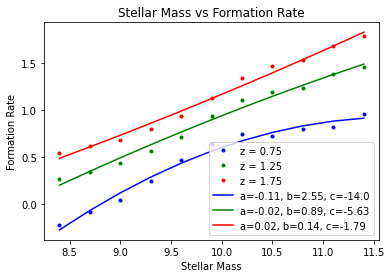

In [ ]:
plt.plot(mass1, rate1, 'b.', label = "z = 0.75")
plt.plot(mass2, rate2, 'g.', label = "z = 1.25")
plt.plot(mass3, rate3, 'r.', label = "z = 1.75")
curve1 = np.polyfit(mass1, rate1, 2)
curve2 = np.polyfit(mass2, rate2, 2)
curve3 = np.polyfit(mass3, rate3, 2)

graph1 = []
graph2 = []
graph3 = []
for i in range(len(mass1)):
  graph1.append(curve1[0] * mass1[i] * mass1[i] + curve1[1] * mass1[i] + curve1[2])
  graph2.append(curve2[0] * mass2[i] * mass2[i] + curve2[1] * mass2[i] + curve2[2])
  graph3.append(curve3[0] * mass3[i] * mass3[i] + curve3[1] * mass3[i] + curve3[2])
plt.plot(mass1, graph1, 'b', label=f'a={round(curve1[0], 2)}, b={round(curve1[1], 2)}, c={round(curve1[2], 2)}')
plt.plot(mass2, graph2, 'g', label=f'a={round(curve2[0], 2)}, b={round(curve2[1], 2)}, c={round(curve2[2], 2)}')
plt.plot(mass3, graph3, 'r', label=f'a={round(curve3[0], 2)}, b={round(curve3[1], 2)}, c={round(curve3[2], 2)}')
plt.legend()
plt.ylabel("Formation Rate")
plt.xlabel("Stellar Mass")
plt.title("Stellar Mass vs Formation Rate")

 Seq       RA          DE     F225W  F275W  ... F606W  F625W  F658N  F814W 
----- ----------- ----------- ------ ------ ... ------ ------ ------ ------
    1 201.7162676 -47.5126489 23.421 22.291 ...  19.99  19.76 19.526 19.311
    2  201.715687 -47.5123958 20.674 19.843 ... 18.436 18.248 18.056 17.886
    3 201.7142821 -47.5123325 21.045 20.156 ...  18.65 18.468 18.271 18.092
    4 201.7150112 -47.5122876 24.545 22.899 ... 20.289 20.133 19.908 19.579
    5 201.7138235 -47.5122802 23.926 22.485 ... 20.033 19.801 19.578 19.333
    6 201.7158384  -47.512243 21.261 20.377 ... 18.831 18.625 18.421 18.248
    7 201.7153042 -47.5121646 21.184 20.318 ... 18.803 18.633 18.426 18.202
    8 201.7150457 -47.5121237 21.843 20.905 ... 19.282 19.092 18.866 18.681
    9 201.7166455 -47.5121043 21.047 20.206 ... 18.726 18.548  18.34 18.132
   10 201.7164538 -47.5120773 21.519 20.593 ... 19.058  18.87 18.676 18.444
  ...         ...         ...    ...    ... ...    ...    ...    ...    ...
32504 201.72

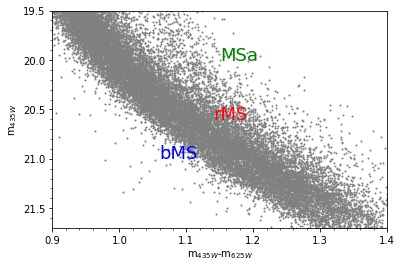

In [ ]:
data2 = ascii.read("/content/ngc5139.dat",data_start=15,header_start=12) 
print(data2)
x = np.array(data2['F435W'] - data2['F625W'])
y = np.array(data2['F435W'])
plt.scatter(x,y,s=1,c='grey')
plt.xlim([0.9,1.4])
plt.ylim([21.7,19.5])
plt.xlabel('m$_{435W}$-m$_{625W}$')
plt.ylabel('m$_{435W}$')
plt.text(1.06, 21,'bMS', c='b',fontsize=18)
plt.text(1.14, 20.6,'rMS', c='r',fontsize=18)
plt.text(1.15, 20,'MSa', c='g',fontsize=18)
plt.yticks(np.arange(19.5,22,step=0.5))
plt.xticks(np.arange(0.9,1.5, step=0.1))
plt.minorticks_on()

In [ ]:
l1 = [0.4,1.7]
v1 = np.array(l1/la.norm(l1))
l2 = [-l1[1], l1[0]]
v2 = np.array(l2/la.norm(l2))

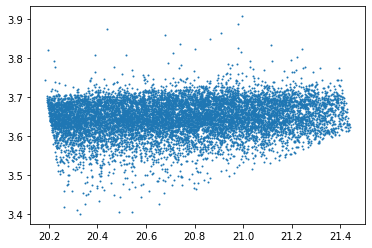

In [ ]:
newX = []
newY = []
for i in range(len(x)):
    if 0.9 < x[i] < 1.4 and 20.5 < y[i] < 21.7:
        newX.append((x[i]*v1[0]+y[i]*v1[1]))
        newY.append(x[i]*v2[0]+y[i]*v2[1])
plt.scatter(newX, newY, s = 1)

Text(0.5, 1.0, 'x·n')

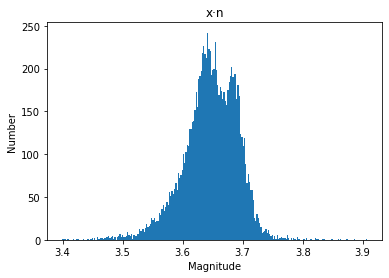

In [ ]:
plt.hist(newY, bins = 240)
plt.xlabel("Magnitude")
plt.ylabel("Number")
plt.title("x·n")